## Part 3 - Sentiment and Word Count Analysis

In [0]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('gdrive/My Drive//No-More-Silence/glbths_2005-13_001_001.csv')

In [7]:
df

,Unnamed: 0,Sentiment,Magnitude,Cleaned,Retained,Extracted,document_page_id
0,0,-0.6,0.6,july 24 de ar sue louisiana state penitentiary...,0.775498,"July 24, 1990\nDe ar Sue,\nIhe Louisiana State...",glbths_2005-13_001_001.pdf_0
1,1,-0.7,1.5,since then there have been absolutely no effor...,0.796132,Since then there have been absolutely no effor...,glbths_2005-13_001_001.pdf_1
2,2,-0.2,0.2,and be cause of his inability to intellectuall...,0.806931,And be cause of his inability to intellectuall...,glbths_2005-13_001_001.pdf_2
3,3,-0.6,0.6,sue if possible will you consider sending me a...,0.842022,"Sue,\nIf possible will you consider sending me...",glbths_2005-13_001_001.pdf_3
4,4,0.0,0.0,pm albert clark cell 4 louisiana state peniten...,0.562500,TOUGE\nPM\nAlbert Chui Clark\n79909\nČK D_Tier...,glbths_2005-13_001_001.pdf_4
5,5,-0.5,0.5,not censored not responsible for contents la p...,0.848739,NOT CENSORED\nNot Responsible for Contents\nLa...,glbths_2005-13_001_001.pdf_5
6,6,-0.5,0.5,jan 91 dean an low was your christmas d t seen...,0.504621,"Jan '91\nDean An,\nklay\nLow was your\nchristm...",glbths_2005-13_001_001.pdf_6
7,7,-0.2,0.2,as d t any of any the to 90 l n till year an g...,0.542120,tr as d lanen t develaped any of\nany\nThe com...,glbths_2005-13_001_001.pdf_7
8,8,0.0,0.0,c austin pm 78 us lint p 0 box tx usa 2 jan se...,0.401274,C NESON\nAUSTIN\nPM\nイX 78\nRiCHARD\nus# 78826...,glbths_2005-13_001_001.pdf_8
9,9,-0.5,0.5,fletcher ta health talk that each its i 7 some...,0.391489,Doud Fletcher\nWorksatRles\nta Publec Health O...,glbths_2005-13_001_001.pdf_9


In [0]:
#df_categories = pd.read_csv('gdrive/My Drive//No-More-Silence/glbths_2005-13_001_001_categories.csv')

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

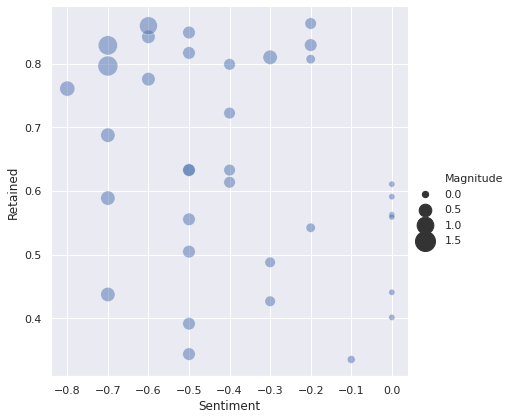

In [8]:
sns.relplot(x="Sentiment", y="Retained", size="Magnitude",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

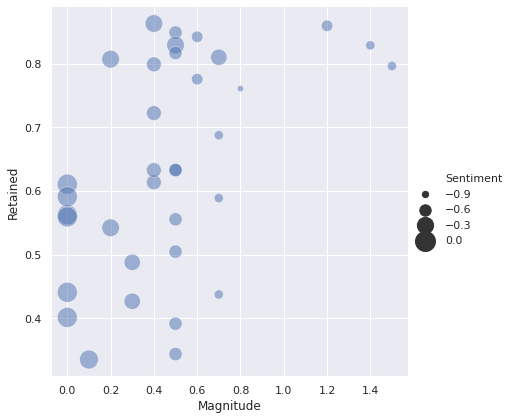

In [9]:
sns.relplot(x="Magnitude", y="Retained", size="Sentiment",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [0]:
from nltk.corpus import words
from nltk.corpus import wordnet 
from nltk.corpus import stopwords
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
words = [word.lower() for word in df['Cleaned'][0].split() if len(word) > 2]
words = [word for word in words if word not in stopwords.words('english')]

In [0]:
fdist = nltk.FreqDist(words)

In [14]:
for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

positive;5
confined;4
hiv;4
aids;4
angola;3
prison;3
state;2
land;2
man;2
two;2


In [15]:
df.describe()

,Unnamed: 0,Sentiment,Magnitude,Retained
count,35.000000,35.000000,35.000000,35.000000
mean,17.000000,-0.385714,0.471429,0.638130
std,10.246951,0.245120,0.364265,0.165918
min,0.000000,-0.800000,0.000000,0.335221
25%,8.500000,-0.550000,0.250000,0.523370
50%,17.000000,-0.400000,0.500000,0.632622
75%,25.500000,-0.200000,0.600000,0.802844
max,34.000000,0.000000,1.500000,0.862869


In [16]:
# try word freqency by quartile
q1 = list(df[df['Retained'] <= 0.523370]['Cleaned'])
q2 = list(df[df['Retained'] > 0.523370][df['Retained'] <= 0.632716]['Cleaned'])
q3 = list(df[df['Retained'] > 0.632716][df['Retained'] <= 0.805064]['Cleaned'])
q4 = list(df[df['Retained'] > 0.805064]['Cleaned'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def word_freq(text):
  words = [word.lower() for word in text.split() if len(word) > 2]
  words = [word for word in words if word not in stopwords.words('english')]
  frequency_dist = nltk.FreqDist(words)
  return frequency_dist

In [0]:
def most_freq(df, num):
  mf_terms = []
  mf_count = []
  fdist = word_freq("".join(df))
  for w, f in fdist.most_common(num):
      mf_terms.append(w)
      mf_count.append(f)
  return (mf_terms, mf_count)

In [0]:
mf_q1 = most_freq(q1, 20)
mf_q2 = most_freq(q2, 20)
mf_q3 = most_freq(q3, 20)
mf_q4 = most_freq(q4, 20)
q1_df = pd.DataFrame({"q1_word": mf_q1[0], "q1_count": mf_q1[1]})
q2_df = pd.DataFrame({"q2_word": mf_q2[0], "q2_count": mf_q2[1]}) 
q3_df = pd.DataFrame({"q3_word": mf_q3[0], "q3_count": mf_q3[1]}) 
q4_df = pd.DataFrame({"q4_word": mf_q4[0], "q4_count": mf_q4[1]})                          

In [20]:
pd.concat([pd.concat([q1_df, q2_df], axis=1),pd.concat([q3_df, q4_df], axis=1)], axis=1)

,q1_word,q1_count,q2_word,q2_count,q3_word,q3_count,q4_word,q4_count
0,get,7,cause,5,one,14,aids,22
1,day,3,aids,5,aids,13,medical,12
2,box,3,time,4,prison,12,prison,10
3,let,3,without,4,hiv,8,state,9
4,net,3,sue,3,confined,6,facility,9
5,jan,2,came,3,angola,6,hiv,9
6,see,2,men,3,sex,6,one,8
7,may,2,went,3,get,6,unit,7
8,want,2,prison,3,positive,5,care,7
9,went,2,virus,3,men,5,information,6
